<h1>3. Data Visualization</h1>

1. Analyze the data, draw conclusions, and effectively communicate your main observations and results.
2. Calculate appropriate summary statistics.
3. Use appropriate isualizations and other tools to thoughtfully identify and evaluate what the data is telling you andhow well suited the data are to answering your problem
4. Make it pretty!

<table>
    <tr>
        <td><img src="images/pickup_locations.png" alt="pickup_locations", width=600, height=500></td>
        <td><img src="images/dropoff_locations.png" alt="dropoff_locations", width=600, height=500></td>
    </tr>
    <tr>
        <td><img src="images/kmeans_200_pickup.png" alt="kmeans_200_pickup", width=600, height=500></td>
        <td><img src="images/kmeans_200_dropoff.png" alt="kmeans_200_dropoff", width=600, height=500></td>
    </tr>
</table>


In [1]:
from py_files.data_manager import get_X_y, get_nyc_gdf
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from copy import deepcopy
from sklearn.cluster import KMeans

In [2]:
# load in the cleaned training data and the NYC geopandas dataframe
# with all of the NYC streets
X, y = get_X_y(force_clean=True)
nyc_gdf = get_nyc_gdf()

/home/jeffx/ACME/senior/NYC_Taxi_Trip_Duration/py_files/data_manager.py:175: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc_df = pd.read_csv(f"{data_path}/Centerline.csv")


<Figure size 3200x2400 with 0 Axes>

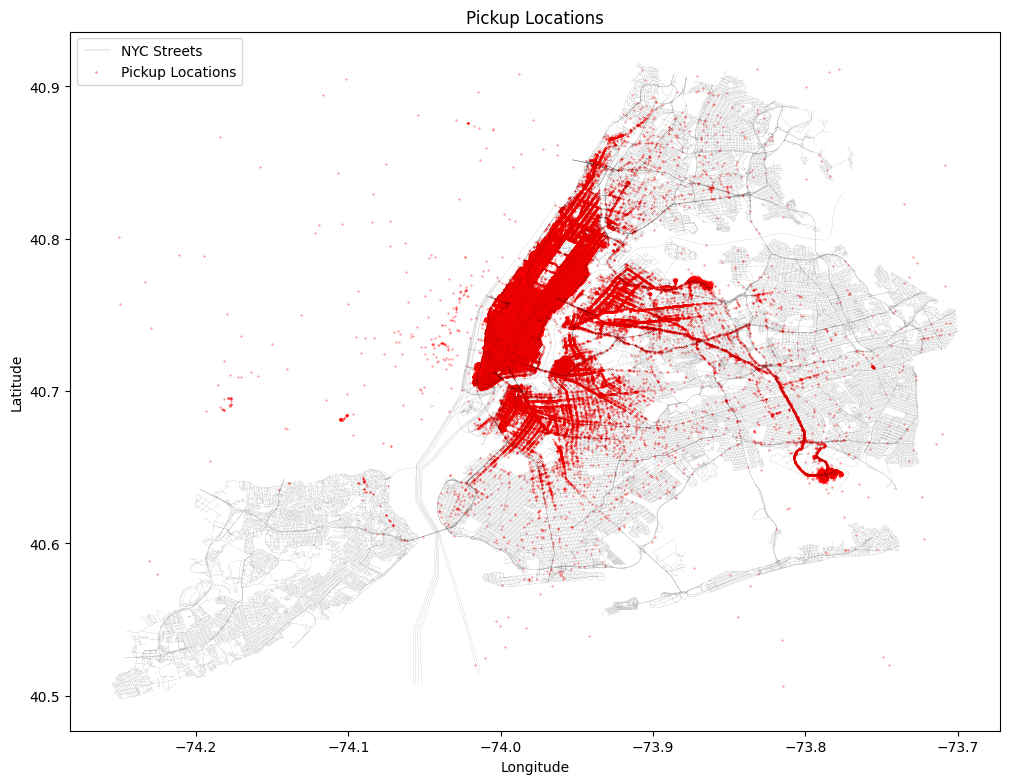

<Figure size 3200x2400 with 0 Axes>

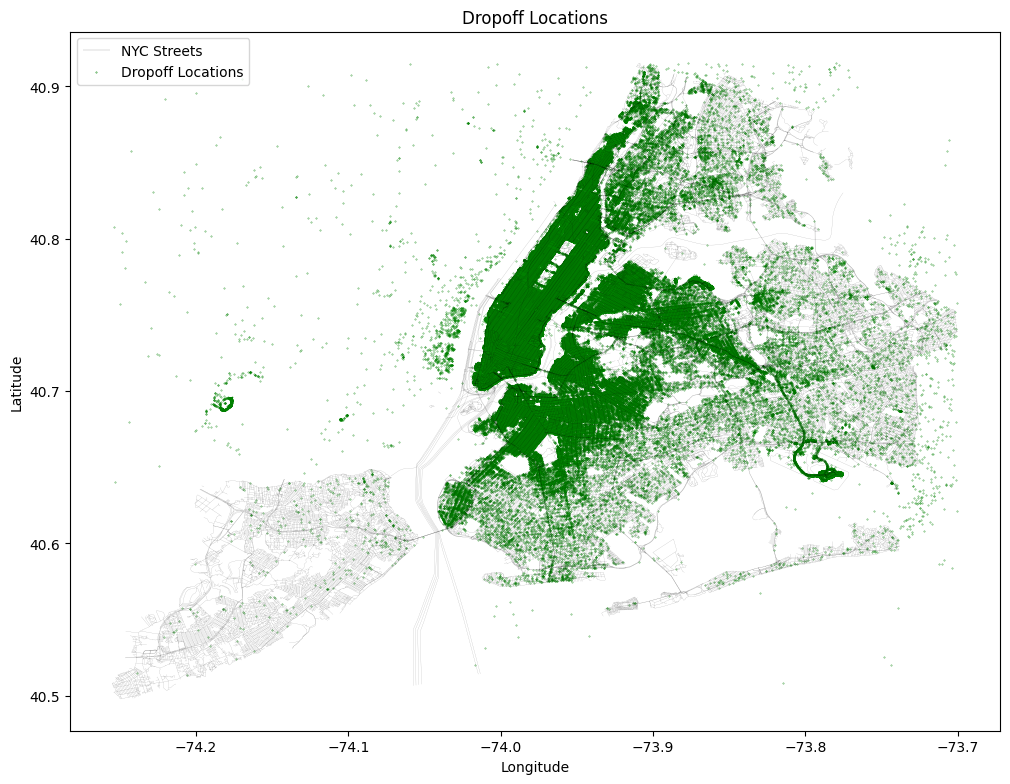

<Figure size 3200x2400 with 0 Axes>

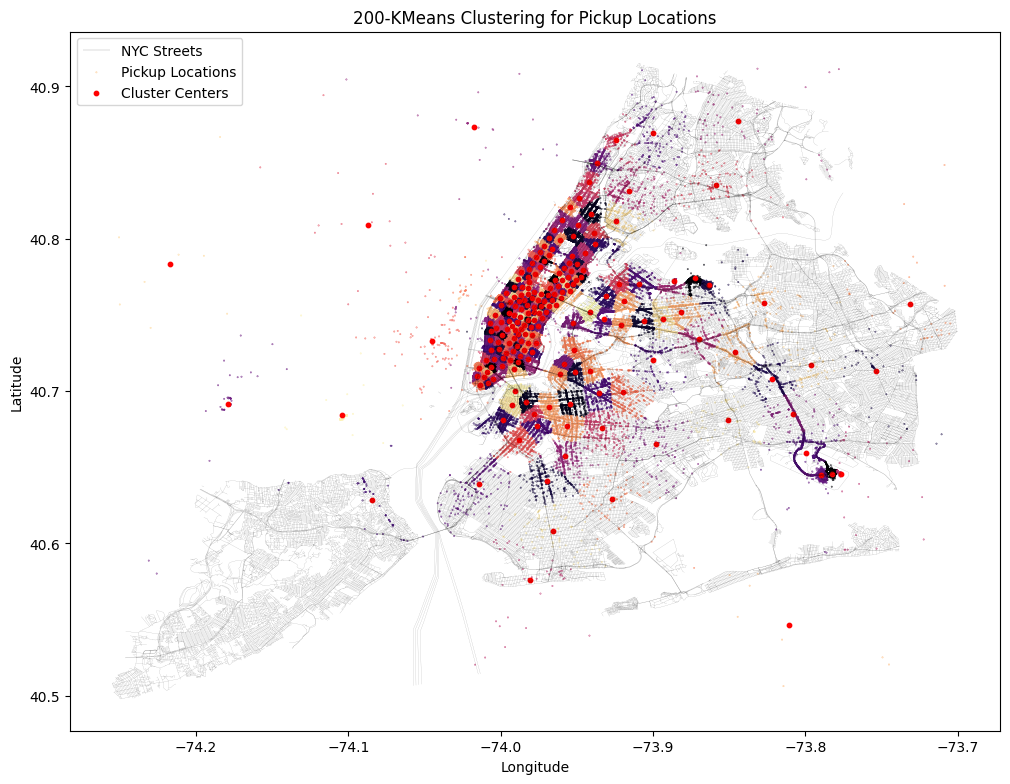

<Figure size 3200x2400 with 0 Axes>

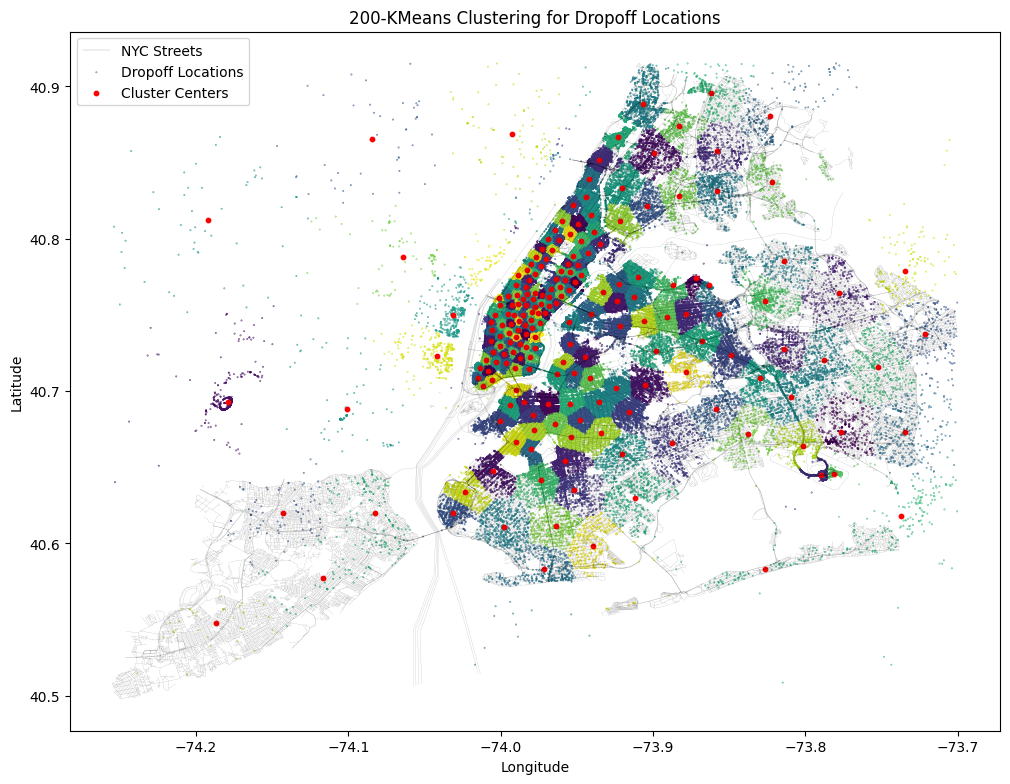

In [6]:
SHOW_PLOTS = True
LOAD_SAVED_KMEANS_MODELS = True

#########################
# PLOT PICKUP LOCATIONS #
#########################

# plot the nyc streets
plt.gcf().set_dpi(500)
nyc_gdf.plot(linewidth=0.1, edgecolor='black', figsize=(12, 12), alpha=0.5, label="NYC Streets")

# plot the pickup locations as a scatter plot on top of the nyc streets
plt.scatter(X['pickup_longitude'], X['pickup_latitude'], c='red', alpha=0.75, s=0.1, label="Pickup Locations")
leg = plt.legend(loc='upper left')
for lh in leg.legend_handles: 
    lh.set_alpha(1)
plt.title("Pickup Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# save the plot
plt.savefig("images/pickup_locations_save.png")
plt.show() if SHOW_PLOTS else plt.clf()

##########################
# PLOT DROPOFF LOCATIONS #
##########################

# plot the nyc streets
plt.gcf().set_dpi(500)
nyc_gdf.plot(linewidth=0.1, edgecolor='black', figsize=(12, 12), alpha=0.5, label="NYC Streets")

# plot the dropoff locations as a scatter plot on top of the nyc streets
plt.scatter(X['dropoff_longitude'], X['dropoff_latitude'], c='green', alpha=0.75, s=0.1, label="Dropoff Locations")
leg = plt.legend(loc='upper left')
for lh in leg.legend_handles: 
    lh.set_alpha(1)
plt.title("Dropoff Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# save the plot
plt.savefig("images/dropoff_locations_save.png")
plt.show() if SHOW_PLOTS else plt.clf()

#####################
# KMEANS CLUSTERING #
#####################

df = deepcopy(X)

# load kmeans_pickup and kmeans_dropoff from the models folder using pickle
if LOAD_SAVED_KMEANS_MODELS:
    with open("models/kmeans_200_pickup.pkl", "rb") as file:
        kmeans_200_pickup = pickle.load(file)
    with open("models/kmeans_200_dropoff.pkl", "rb") as file:
        kmeans_200_dropoff = pickle.load(file)
    
        
# fit kmeans_pickup and kmeans_dropoff with 200 clusters
else:
    n_clusters = 200
    kmeans_pickup = (KMeans(n_clusters=n_clusters)
        .fit(df.loc[:, ['pickup_longitude', 'pickup_latitude']].values))
    kmeans_dropoff = (KMeans(n_clusters=n_clusters)
        .fit(df.loc[:, ['dropoff_longitude', 'dropoff_latitude']].values))
    
    # save the models to pickle files for loading later
    with open("models/kmeans_200_pickup.pkl", "wb") as file:
        pickle.dump(kmeans_pickup, file)
    with open("models/kmeans_200_dropoff.pkl", "wb") as file:
        pickle.dump(kmeans_dropoff, file)

# predict the clusters for each pickup and dropoff location
df['pickup_200_cluster'] = kmeans_200_pickup.predict(df[['pickup_longitude', 'pickup_latitude']].values)
df['dropoff_200_cluster'] = kmeans_200_dropoff.predict(df[['dropoff_longitude', 'dropoff_latitude']].values)

# get the centers
pickup_200_centers = kmeans_200_pickup.cluster_centers_
dropoff_200_centers = kmeans_200_dropoff.cluster_centers_

#######################################
# PLOT PICKUP LOCATIONS WITH CLUSTERS #
#######################################

# plot the nyc streets
plt.gcf().set_dpi(500)
nyc_gdf.plot(linewidth=0.1, edgecolor='black', figsize=(12, 12), alpha=0.5, label="NYC Streets")

# plot the cluster locations and the pickup locations color-coded
# to their associated cluster
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], c=df['pickup_200_cluster'], cmap='magma', alpha=1.0, s=0.1, label="Pickup Locations")
plt.scatter(pickup_200_centers[:, 0], pickup_200_centers[:, 1], c='red', alpha=1, s=10, label="Cluster Centers")
leg = plt.legend(loc='upper left')
for lh in leg.legend_handles: 
    lh.set_alpha(1)
plt.title("200-KMeans Clustering for Pickup Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# save the plot
plt.savefig("images/kmeans_200_pickup_save.png")
plt.show() if SHOW_PLOTS else plt.clf()

########################################
# PLOT DROPOFF LOCATIONS WITH CLUSTERS #
########################################

# plot the nyc streets
plt.gcf().set_dpi(500)
nyc_gdf.plot(linewidth=0.1, edgecolor='black', figsize=(12, 12), alpha=0.5, label="NYC Streets")

# plot the cluster locations and the pickup locations color-coded
# to their associated cluster
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], c=df['dropoff_200_cluster'], cmap='viridis', alpha=1.0, s=0.1, label="Dropoff Locations")
plt.scatter(dropoff_200_centers[:, 0], dropoff_200_centers[:, 1], c='blue', alpha=1, s=10, label="Cluster Centers")
leg = plt.legend(loc='upper left')
for lh in leg.legend_handles: 
    lh.set_alpha(1)
plt.title("200-KMeans Clustering for Dropoff Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# save the plot
plt.savefig("images/kmeans_200_dropoff_save.png")
plt.show() if SHOW_PLOTS else plt.clf()


<Figure size 3200x2400 with 0 Axes>

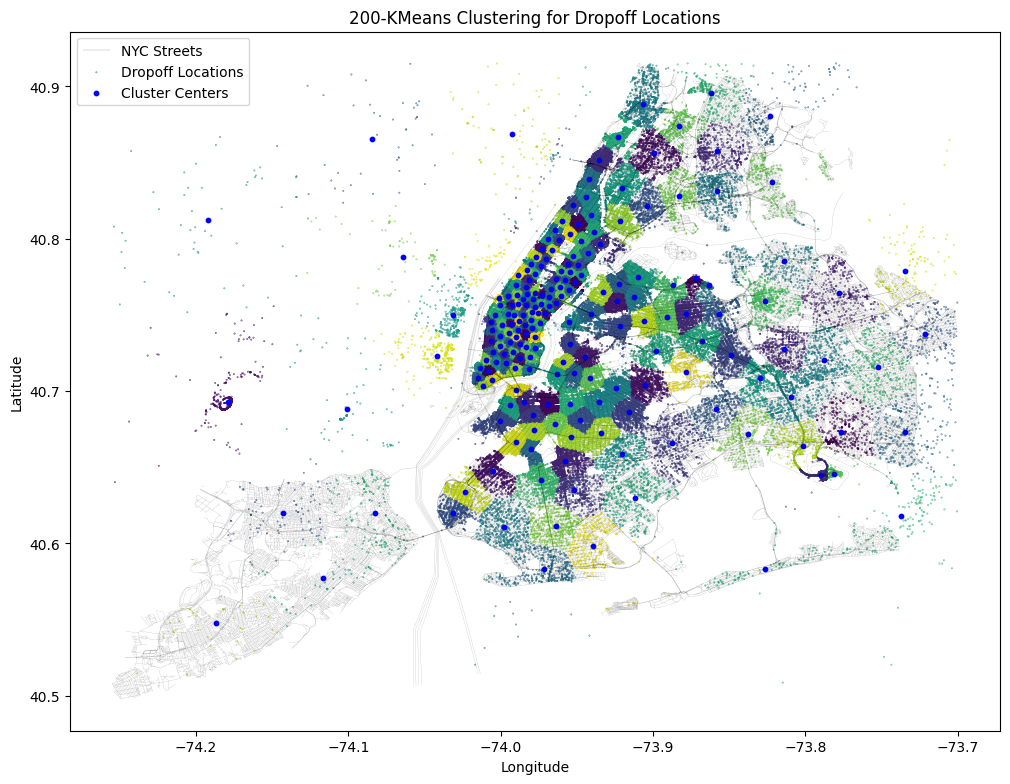

In [5]:
# plot the nyc streets
plt.gcf().set_dpi(500)
nyc_gdf.plot(linewidth=0.1, edgecolor='black', figsize=(12, 12), alpha=0.5, label="NYC Streets")

# plot the cluster locations and the pickup locations color-coded
# to their associated cluster
plt.scatter(df['dropoff_longitude'], df['dropoff_latitude'], c=df['dropoff_200_cluster'], cmap='viridis', alpha=1.0, s=0.1, label="Dropoff Locations")
plt.scatter(dropoff_200_centers[:, 0], dropoff_200_centers[:, 1], c='blue', alpha=1, s=10, label="Cluster Centers")
leg = plt.legend(loc='upper left')
for lh in leg.legend_handles: 
    lh.set_alpha(1)
plt.title("200-KMeans Clustering for Dropoff Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# save the plot
plt.savefig("images/kmeans_200_dropoff_save.png")
plt.show() if SHOW_PLOTS else plt.clf()

In [ ]:

# plot the GeoDataFrame
nyc_gdf.plot(linewidth=0.1, edgecolor='black', figsize=(12, 12), alpha=0.5, label="NYC Streets")

plt.scatter(X['dropoff_longitude'], X['dropoff_latitude'], c='green', alpha=alpha, s=0.1, label="Dropoff Locations")
leg = plt.legend(loc='upper left')
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.title("Dropoff Locations")
plt.show()